In [1]:
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import particle
from hepunits import MeV, GeV

In [3]:
events = ak.from_parquet("~/storage/data/higgs-4leptons-cmsrun1/cms-lhc-electrons-muons-2011-2012.parquet", lazy=True)

In [76]:
muon_mass = particle.Particle.from_string("mu").mass * MeV / GeV

In [77]:
muon_mass

0.1056583745

In [81]:
px = events.muon.pt * np.cosh(events.muon.eta) * np.sin(events.muon.phi)
py = events.muon.pt * np.cosh(events.muon.eta) * np.cos(events.muon.phi)
pz = events.muon.pt * np.sinh(events.muon.eta)
E = np.sqrt(px**2 + py**2 + pz**2 + muon_mass**2)

In [57]:
cut = (ak.num(events.electron) == 0) & (ak.num(px) == 2) & (ak.prod(events.muon.anti * 2 - 1, axis=1) == -1)

In [85]:
pair_mass = np.sqrt((E[cut, 0] + E[cut, 1])**2 - (px[cut, 0] + px[cut, 1])**2 - (py[cut, 0] + py[cut, 1])**2 - (pz[cut, 0] + pz[cut, 1])**2)

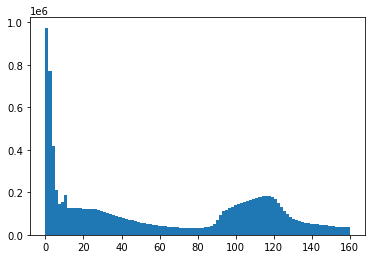

In [86]:
plt.hist(np.asarray(pair_mass), bins=100, range=(0, 160));

In [4]:
electron_mass = particle.Particle.from_string("e").mass * MeV / GeV

In [5]:
electron_mass

0.0005109989460999999

In [6]:
px = events.electron.pt * np.cosh(events.electron.eta) * np.sin(events.electron.phi)
py = events.electron.pt * np.cosh(events.electron.eta) * np.cos(events.electron.phi)
pz = events.electron.pt * np.sinh(events.electron.eta)
E = np.sqrt(px**2 + py**2 + pz**2 + electron_mass**2)

In [7]:
cut = (ak.num(events.muon) == 0) & (ak.num(px) == 2) & (ak.prod(events.electron.anti * 2 - 1, axis=1) == -1)

In [9]:
pair_mass = np.sqrt((E[cut, 0] + E[cut, 1])**2 - (px[cut, 0] + px[cut, 1])**2 - (py[cut, 0] + py[cut, 1])**2 - (pz[cut, 0] + pz[cut, 1])**2)

/home/jpivarski/miniconda3/lib/python3.8/site-packages/awkward/_connect/_numpy.py:154: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(


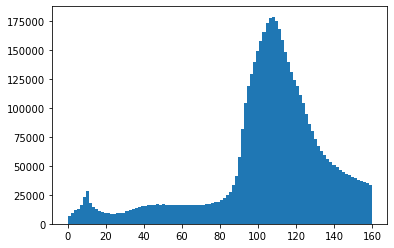

In [13]:
plt.hist(np.asarray(pair_mass), bins=100, range=(0, 160));

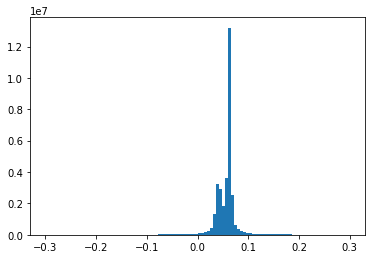

In [18]:
plt.hist(np.asarray(ak.flatten(events.electron.vy)), bins=100, range=(-0.3, 0.3));

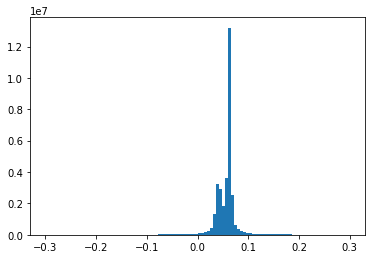

In [17]:
plt.hist(np.asarray(ak.flatten(events.electron.vy)), bins=100, range=(-0.3, 0.3));

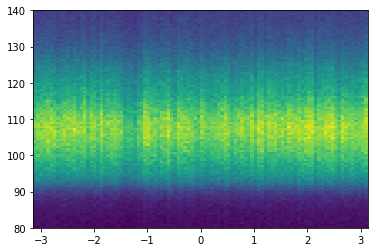

In [34]:
plt.hist2d(np.asarray(events.electron.phi[cut, 0]), np.asarray(pair_mass), bins=(100, 100), range=((-np.pi, np.pi), (80, 140)));

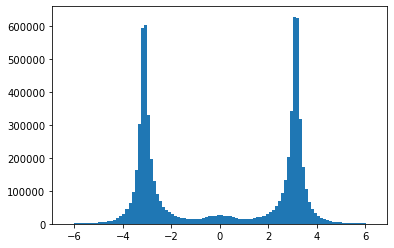

In [32]:
plt.hist(np.asarray(events.electron.phi[cut, 0] - events.electron.phi[cut, 1]), bins=100);